In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def show_all_info_datasets(df: pd.DataFrame):
    with pd.option_context("display.max_columns", None):
        print("Кількість рядків: ", len(df))
        print(df.describe())
        
        for column in df.columns:
            print("\nСтовпець: ", column)
            print(df[column].unique()[:10])

In [26]:
realty_train_df = pd.read_csv("datasets/paris_housing_price/train.csv")

print("Тренувальні дані датасету Paris Housing Price")
show_all_info_datasets(realty_train_df)

Тренувальні дані датасету Paris Housing Price
Кількість рядків:  22730
                 id  squareMeters  numberOfRooms       hasYard       hasPool  \
count  22730.000000  2.273000e+04   22730.000000  22730.000000  22730.000000   
mean   11364.500000  4.658622e+04      48.241091      0.475891      0.452750   
std     6561.730145  4.952124e+04      28.226428      0.499429      0.497773   
min        0.000000  8.900000e+01       1.000000      0.000000      0.000000   
25%     5682.250000  2.039275e+04      25.000000      0.000000      0.000000   
50%    11364.500000  4.448400e+04      47.000000      0.000000      0.000000   
75%    17046.750000  7.154700e+04      75.000000      1.000000      1.000000   
max    22729.000000  6.071330e+06     100.000000      1.000000      1.000000   

             floors       cityCode  cityPartRange  numPrevOwners  \
count  22730.000000   22730.000000   22730.000000   22730.000000   
mean      47.305983   50013.795996       5.585042       5.620766   
std 

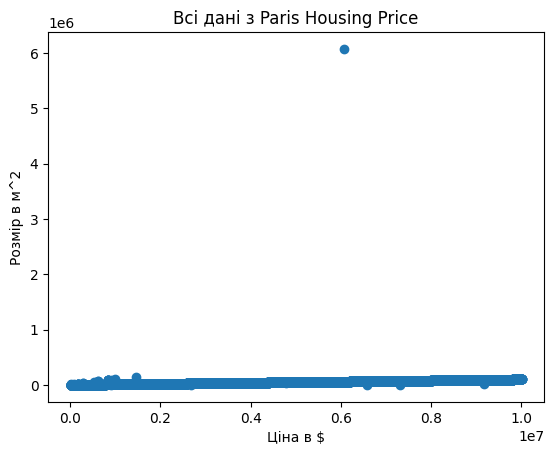

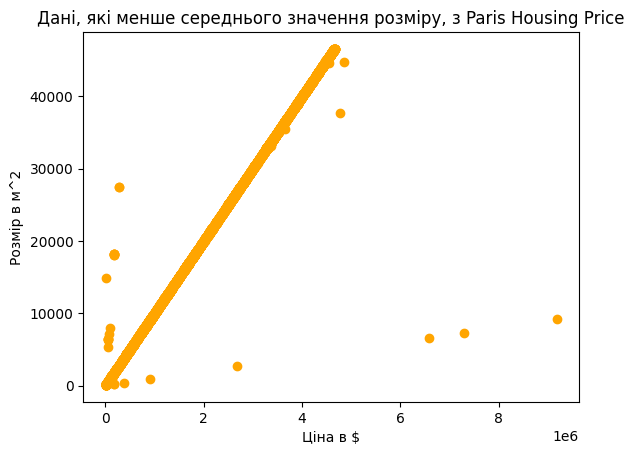

In [18]:
plt.scatter(realty_train_df["price"], realty_train_df["squareMeters"])
plt.xlabel("Ціна в $")
plt.ylabel("Розмір в м^2")
plt.title("Всі дані з Paris Housing Price")
plt.show()

mean = realty_train_df["squareMeters"].mean()

plt.scatter(
    realty_train_df[realty_train_df["squareMeters"] < mean]["price"], 
    realty_train_df[realty_train_df["squareMeters"] < mean]["squareMeters"],
    color="orange"
)
plt.xlabel("Ціна в $")
plt.ylabel("Розмір в м^2")
plt.title("Дані, які менше середнього значення розміру, з Paris Housing Price")
plt.show()

<Axes: >

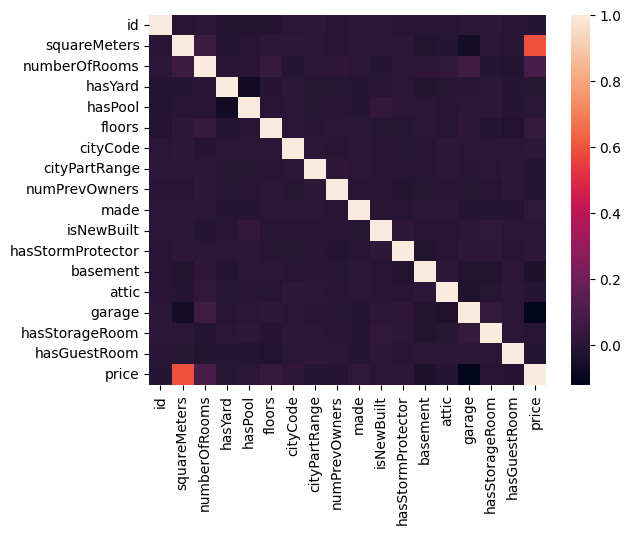

In [103]:
sns.heatmap(realty_train_df.corr())

In [13]:
crimes_df = pd.read_csv("datasets/boston_crimes/crime.csv", encoding="windows-1252")
crimes_df = crimes_df.fillna(0)
crimes_df["SHOOTING"] = crimes_df["SHOOTING"].replace("Y", 1)
crimes_df["REPORTING_AREA"] = crimes_df["REPORTING_AREA"].replace(" ", 0)

print("Дані датасету Crimes in Boston")
show_all_info_datasets(crimes_df)

/tmp/ipykernel_5254/2770959969.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crimes_df["SHOOTING"] = crimes_df["SHOOTING"].replace("Y", 1)


Дані датасету Crimes in Boston
Кількість рядків:  319073
        OFFENSE_CODE       SHOOTING           YEAR          MONTH  \
count  319073.000000  319073.000000  319073.000000  319073.000000   
mean     2317.546956       0.003194    2016.560586       6.609719   
std      1185.285543       0.056422       0.996344       3.273691   
min       111.000000       0.000000    2015.000000       1.000000   
25%      1001.000000       0.000000    2016.000000       4.000000   
50%      2907.000000       0.000000    2017.000000       7.000000   
75%      3201.000000       0.000000    2017.000000       9.000000   
max      3831.000000       1.000000    2018.000000      12.000000   

                HOUR            Lat           Long  
count  319073.000000  319073.000000  319073.000000  
mean       13.118205      39.568449     -66.463852  
std         6.294205      10.443561      17.516694  
min         0.000000      -1.000000     -71.178674  
25%         9.000000      42.290736     -71.095264  
50%

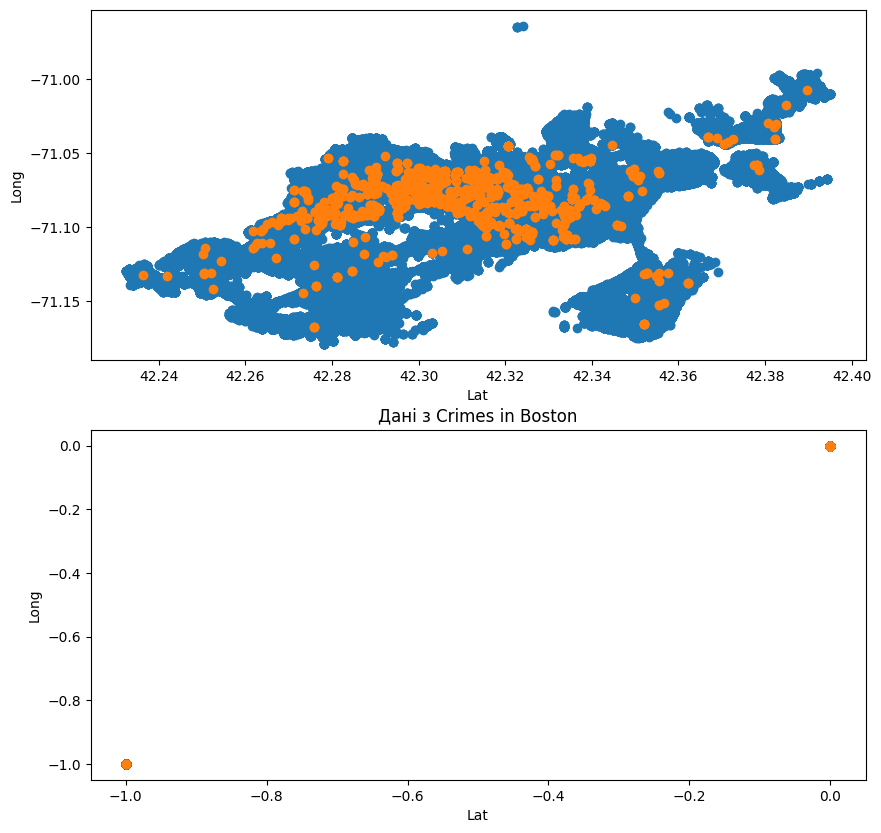

In [23]:
crimes_df1 = crimes_df[crimes_df["Long"] < -5]
crimes_df2 = crimes_df[crimes_df["Long"] >= -5]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.scatter(
    crimes_df1[crimes_df1["SHOOTING"] == 0]["Lat"], 
    crimes_df1[crimes_df1["SHOOTING"] == 0]["Long"],
)
ax1.scatter(
    crimes_df1[crimes_df1["SHOOTING"] == 1]["Lat"], 
    crimes_df1[crimes_df1["SHOOTING"] == 1]["Long"], 
)
ax1.set_xlabel("Lat")
ax1.set_ylabel("Long")

ax2.scatter(
    crimes_df2[crimes_df2["SHOOTING"] == 0]["Lat"], 
    crimes_df2[crimes_df2["SHOOTING"] == 0]["Long"],
)
ax2.scatter(
    crimes_df2[crimes_df2["SHOOTING"] == 1]["Lat"], 
    crimes_df2[crimes_df2["SHOOTING"] == 1]["Long"], 
)
ax2.set_xlabel("Lat")
ax2.set_ylabel("Long")

plt.title("Дані з Crimes in Boston")
plt.show()

<Axes: >

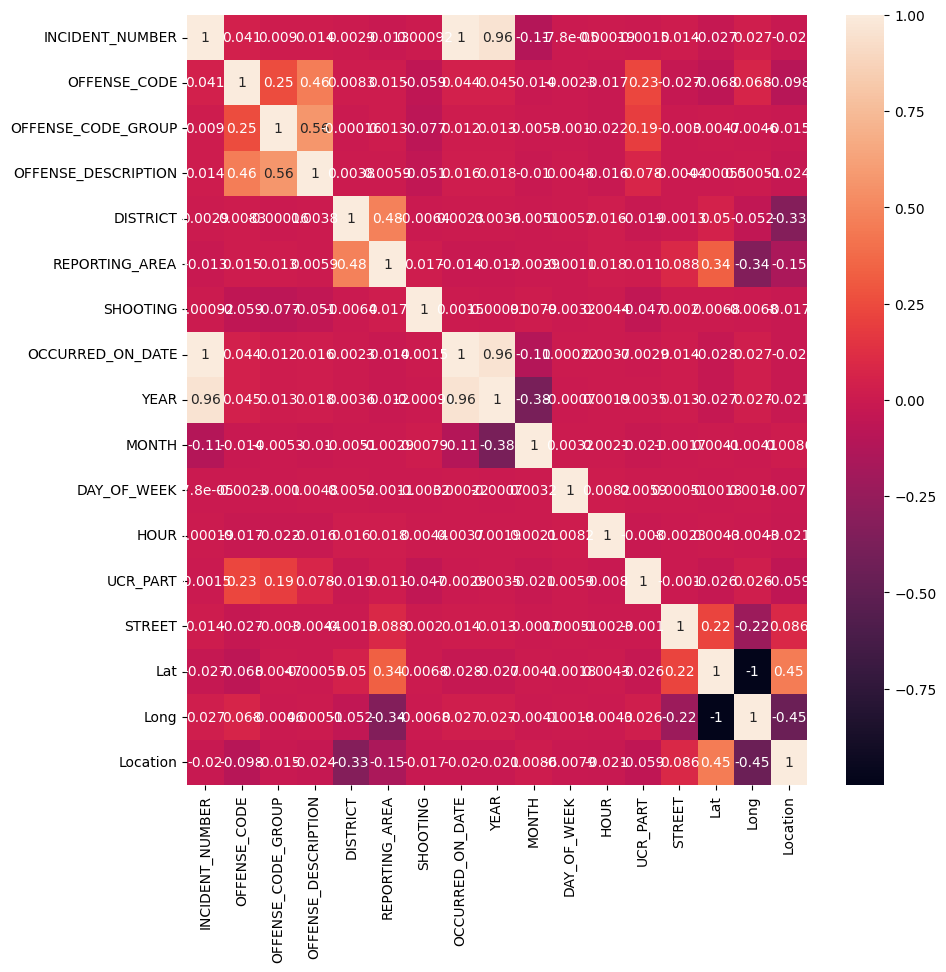

In [104]:
filtered_df = crimes_df
for column in filtered_df.columns:
    try:
        filtered_df[column].astype(float) 
    except:
        filtered_df[column] = filtered_df[column].astype("category").cat.codes

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(filtered_df.corr(), annot=True, ax=ax)

In [27]:
housing_train_df = pd.read_csv("datasets/housing_price/train.csv")
show_all_info_datasets(housing_train_df)

Кількість рядків:  1460
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.0

Text(0.5, 1.0, 'Дані з Housing Price')

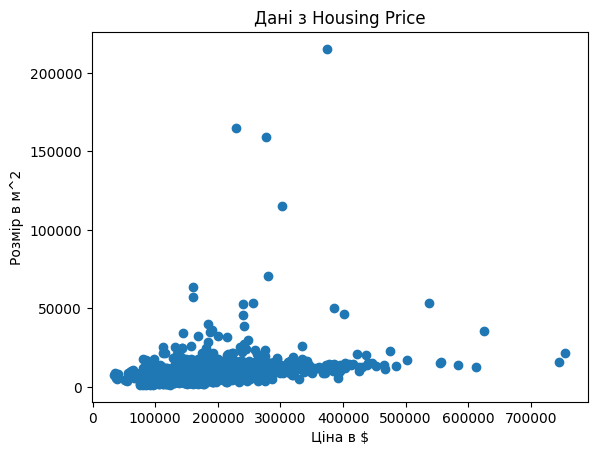

In [24]:
plt.scatter(housing_train_df["SalePrice"], housing_train_df["LotArea"])
plt.xlabel("Ціна в $")
plt.ylabel("Розмір в м^2")
plt.title("Дані з Housing Price")

<Axes: >

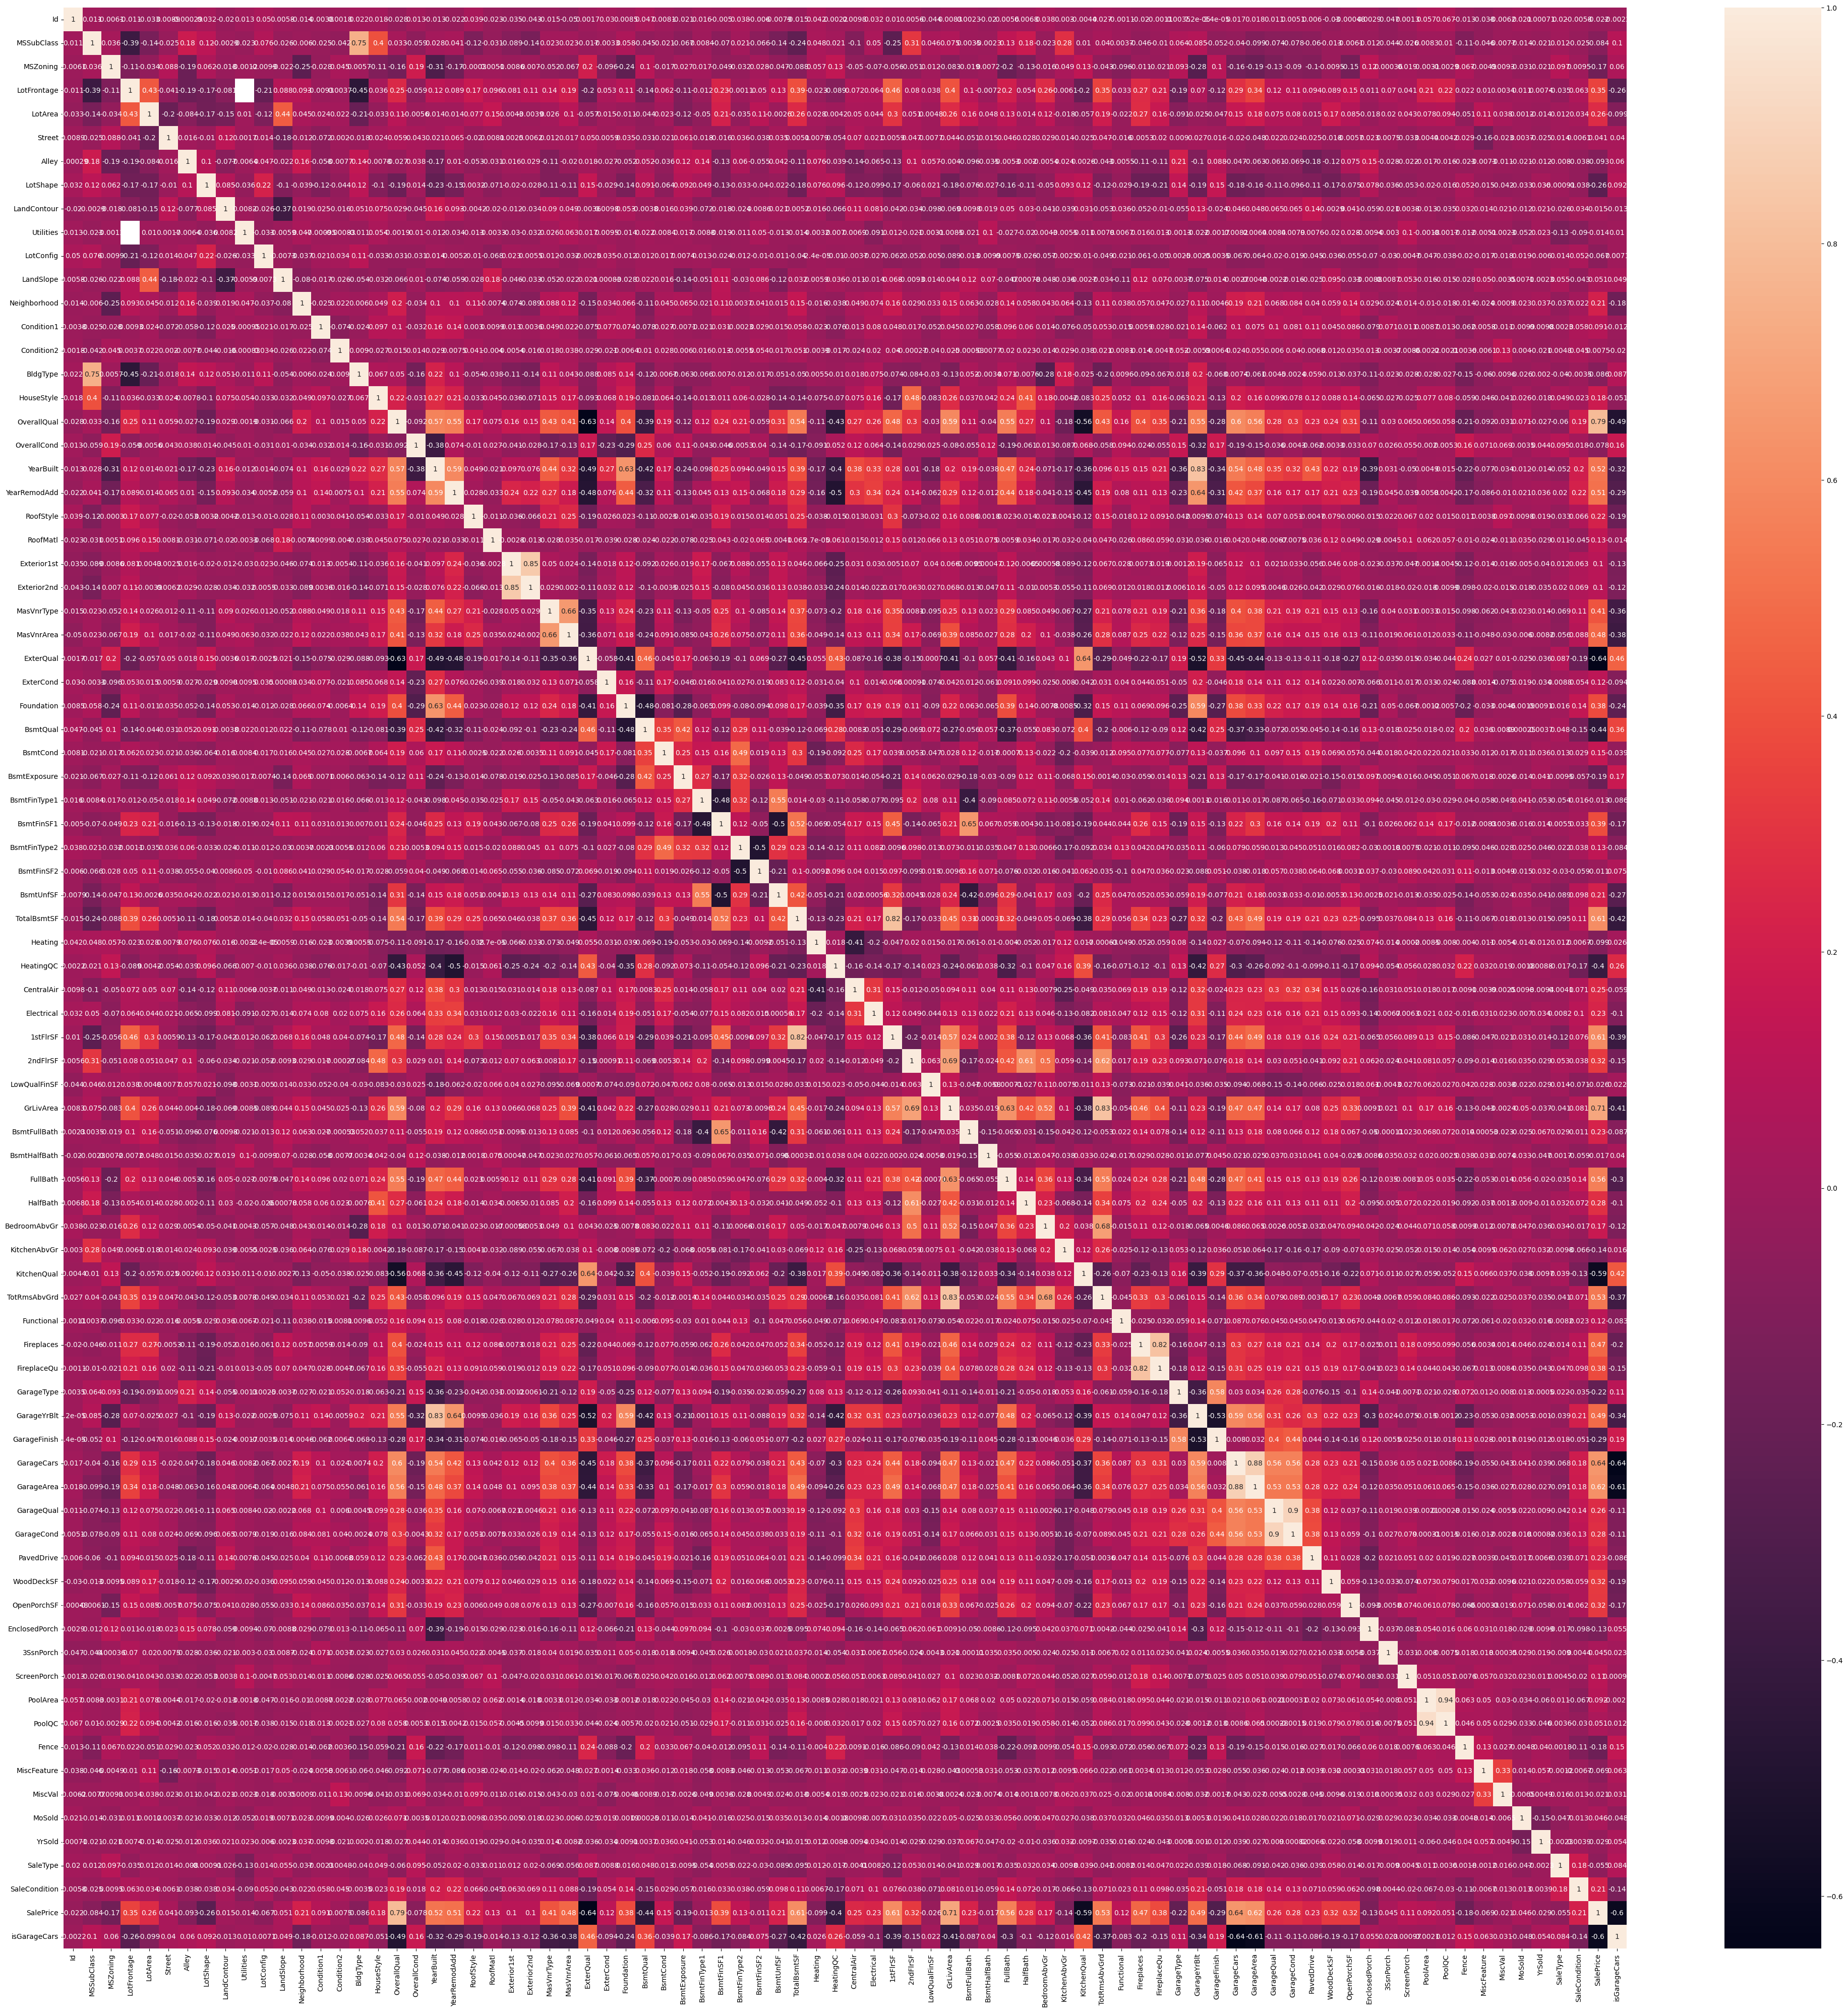

In [25]:
filtered_df = housing_train_df

for column in filtered_df.columns:
    try:
        filtered_df[column].astype(float)
    except:
        filtered_df[column] = filtered_df[column].astype("category").cat.codes

filtered_df["isGarageCars"] = False
filtered_df["isGarageCars"] = filtered_df[filtered_df["GarageCars"] > 2]["isGarageCars"].fillna(True)
filtered_df["isGarageCars"] = filtered_df["isGarageCars"].astype(bool)

fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(filtered_df.corr(), annot=True, ax=ax)